In [4]:
from datasets import load_dataset, Image
from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy

from PIL import Image

In [18]:
IMG_DIR = './imgs/'

num_invalids = 0

for race in ["East Asian", "Indian", "Black", "White", "Middle Eastern", "Latino_Hispanic", "Southeast Asian"]:
    RACE_DIR = IMG_DIR + race + '/'

    for i in range(5):
        IMG_PATH = RACE_DIR+f'face_{race}_{i}.png'
        with Image.open(IMG_PATH) as img:
            img = np.asarray(img)
            if np.sum(img) == 0:
                num_invalids += 1

In [19]:
num_invalids

6

In [10]:
dataset = load_dataset("HuggingFaceM4/FairFace")

No config specified, defaulting to: fair_face/0.25
Found cached dataset fair_face (/home/teamteam/.cache/huggingface/datasets/HuggingFaceM4___fair_face/0.25/1.0.0/911f172b84f85947043eeca099b4af3358f10dcd579602930d0aeb119e5ce095)
100%|██████████| 2/2 [00:00<00:00, 544.93it/s]


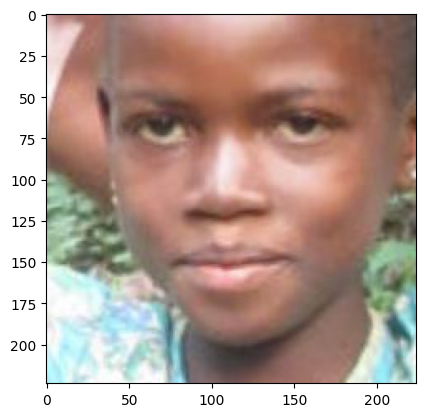

In [11]:
plt.imshow(dataset["train"][2]["image"])
plt.show()

In [12]:
cols = ["age", "gender", "race", "service_test"]

In [13]:
age = ["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "more than 70"]
gender = ["M", "F"]
race = ["East Asian", "Indian", "Black", "White", "Middle Eastern", "Latino_Hispanic", "Southeast Asian"]

In [14]:
age_counts = [0]*len(age)
gender_counts = [0]*len(gender)
race_counts = [0]*len(race)

age_list = dataset["train"][:]["age"]
gender_list = dataset["train"][:]["gender"]
race_list = dataset["train"][:]["race"]

KeyboardInterrupt: 

In [ ]:
for i in range(len(age)):
    age_counts[i] = age_list.count(i)

for i in range(len(gender)):
    gender_counts = gender_list.count(i)

for i in range(len(race)):
    race_counts[i] = race_list.count(i)

In [ ]:
race_counts

[12287, 12319, 12233, 16527, 9216, 13367, 10795]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


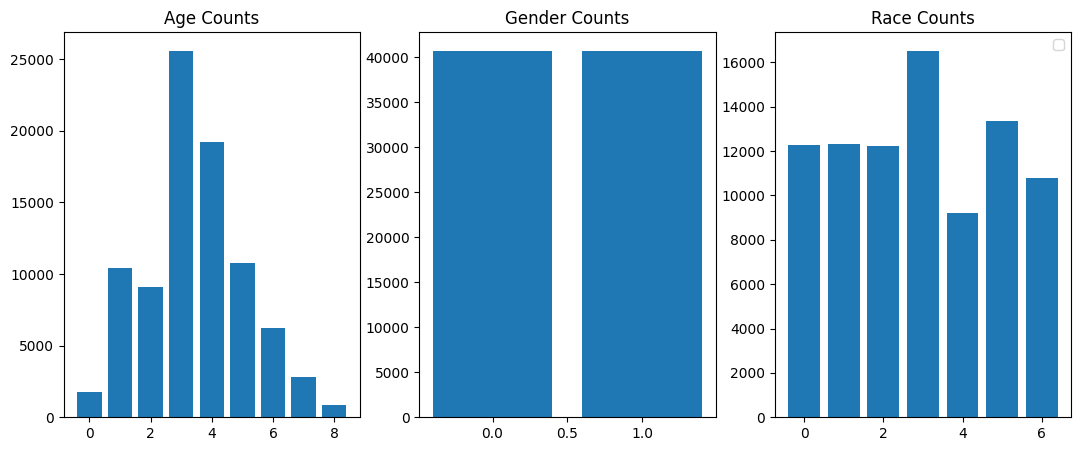

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(13, 5))

axs[0].bar(np.arange(0, len(age)), age_counts)
axs[0].set_title("Age Counts")

axs[1].bar(np.arange(0, len(gender)), gender_counts)
axs[1].set_title("Gender Counts")

axs[2].bar(np.arange(0, len(race)), race_counts)
axs[2].set_title("Race Counts")

plt.legend()

plt.show()

In [15]:
txts = [None]*len(race)

for i in range(len(race)):
    race_txt = race[i]

    if "Latino" in race_txt:
        race_txt = race_txt.split('_')
        prompt = "face of " + race_txt[0] + " " + race_txt[1] + " " + " person"

    else:
        prompt = "face of " + race_txt + " person"
    txts[i] = prompt

In [16]:
txts

['face of East Asian person',
 'face of Indian person',
 'face of Black person',
 'face of White person',
 'face of Middle Eastern person',
 'face of Latino Hispanic  person',
 'face of Southeast Asian person']

In [17]:
def add_prompt(entry):
    race_ind = entry["race"]
    prompt = txts[race_ind]
    entry["text"] = prompt
    return entry

In [30]:
dataset["train"] = dataset["train"].map(add_prompt)
dataset["validation"] = dataset["validation"].map(add_prompt)

Loading cached processed dataset at /home/teamteam/.cache/huggingface/datasets/HuggingFaceM4___fair_face/0.25/1.0.0/911f172b84f85947043eeca099b4af3358f10dcd579602930d0aeb119e5ce095/cache-659a549bfa65a7d1.arrow
Loading cached processed dataset at /home/teamteam/.cache/huggingface/datasets/HuggingFaceM4___fair_face/0.25/1.0.0/911f172b84f85947043eeca099b4af3358f10dcd579602930d0aeb119e5ce095/cache-9a4fa4f442e70e3a.arrow


In [32]:
dataset["validation"]

Dataset({
    features: ['image', 'age', 'gender', 'race', 'service_test', 'text'],
    num_rows: 10954
})

In [20]:
working_dataset.remove_columns(['age', 'gender', 'race', 'service_test'])

Dataset({
    features: ['image', 'text'],
    num_rows: 86744
})

In [35]:
dataset.save_to_disk('ff_prompts_only')

In [34]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test', 'text'],
        num_rows: 86744
    })
    validation: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test', 'text'],
        num_rows: 10954
    })
})

In [ ]:
# Sec : iOQ1W0V5Rk2KwDGF58Fc7FHngCE+Y4RwIt5RtCfU

In [ ]:
face_black_counter = 0

In [1]:
import torch
from diffusers import StableDiffusionPipeline

model_path = "./model_save/"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda:0")

faces_black = pipe(prompt="face of Black person", num_images_per_prompt=10, num_inference_steps = 100, guidance_scale=1.5).images

for i in range(len(faces_black)):
    faces_black[i].save(f"./imgs/face_black_{face_black_counter}")

#image.save("./imgs/b1.png")

# image = pipe(prompt="face of East Asian person").images[0]
# image.save("./imgs/ea1.png")

# image = pipe(prompt="face of Middle Eastern person").images[0]
# image.save("./imgs/me1.png")

# image = pipe(prompt="face of Indian person").images[0]
# image.save("./imgs/i1.png")

# image = pipe(prompt="face of White person").images[0]
# image.save("./imgs/w1.png")

# image = pipe(prompt="face of Latino Hispanic person").images[0]
# image.save("./imgs/lh1.png")

# image = pipe(prompt="face of South East Asian person").images[0]
# image.save("./imgs/sea1.png")

/home/teamteam/fairface/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/teamteam/fairface/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
  0%|          | 0/50 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 125.00 GiB (GPU 0; 23.68 GiB total capacity; 11.20 GiB already allocated; 9.72 GiB free; 12.55 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

: 

In [39]:
image = pipe(prompt="face of person").images[0]
image.save("./imgs/person1.png")

image = pipe(prompt="face of person").images[0]
image.save("./imgs/person2.png")

image = pipe(prompt="face of person").images[0]
image.save("./imgs/person3.png")

image = pipe(prompt="face of person").images[0]
image.save("./imgs/person4.png")

image = pipe(prompt="face of person").images[0]
image.save("./imgs/person5.png")

image = pipe(prompt="face of person").images[0]
image.save("./imgs/person6.png")

100%|██████████| 50/50 [00:11<00:00,  4.47it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|██████████| 50/50 [00:10<00:00,  4.56it/s]
